In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

#kütüphaneleri import ediyoruz

In [2]:
data=pd.read_csv("veri.csv", sep=";", encoding="windows-1252")


#arac.csv verisini okuyup verilerini import ediyoruz.

In [3]:
data.info()
#kolonların veri tipi,veri sayısı hakkında bilgi 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 14 columns):
ilan_No        501 non-null object
ilan_tarihi    501 non-null object
marka          501 non-null object
seri           501 non-null int64
model          501 non-null object
yil            501 non-null int64
yakit          501 non-null int64
vites          501 non-null int64
km             501 non-null float64
renk           501 non-null int64
motor_gucu     501 non-null int64
motor_hacim    501 non-null int64
kasa_tipi      501 non-null object
fiyat          501 non-null float64
dtypes: float64(2), int64(7), object(5)
memory usage: 54.9+ KB


In [4]:
type(data)
#data nın veri yapısı hakkında bilgi

pandas.core.frame.DataFrame

In [5]:
data.columns
#kolonların isimleri

Index(['ilan_No', 'ilan_tarihi', 'marka', 'seri', 'model', 'yil', 'yakit',
       'vites', 'km', 'renk', 'motor_gucu', 'motor_hacim', 'kasa_tipi',
       'fiyat'],
      dtype='object')

In [6]:
data.describe()
#sayısal veri tipli kolonlar hakkında min,ax,mean vb. bilgiler

,seri,yil,yakit,vites,km,renk,motor_gucu,motor_hacim,fiyat
count,501.0,501.000000,501.0,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,3.0,2007.219561,1.0,0.061876,222.614854,2.900200,168.896208,1994.758483,83.078471
std,0.0,3.627078,0.0,0.241171,70.310702,2.189525,15.610420,24.200404,31.189657
min,3.0,1998.000000,1.0,0.000000,42.000000,1.000000,125.000000,1951.000000,36.000000
25%,3.0,2005.000000,1.0,0.000000,179.000000,2.000000,163.000000,1995.000000,62.500000
50%,3.0,2006.000000,1.0,0.000000,222.100000,2.000000,163.000000,1995.000000,73.950000
75%,3.0,2010.000000,1.0,0.000000,270.000000,3.000000,184.000000,1995.000000,101.000000
max,3.0,2015.000000,1.0,1.000000,425.000000,15.000000,225.000000,2500.000000,187.000000


In [7]:
data.head(7)
#ilk 15 veriyi gösterme

,ilan_No,ilan_tarihi,marka,seri,model,yil,yakit,vites,km,renk,motor_gucu,motor_hacim,kasa_tipi,fiyat
0,672767839,16.03.2019,BMW,3,320d Standart,2010,1,0,230.0,2,177,1995,sedan,90.5
1,671626694,13.03.2019,BMW,3,320d Standart,2013,1,0,120.0,1,184,1995,sedan,141.9
2,628429770,01.03.2019,BMW,3,320d Standart,2004,1,0,230.0,3,150,2000,sedan,65.5
3,664465457,23.02.2019,BMW,3,320d Standart,2013,1,0,100.0,1,184,1995,sedan,165.0
4,674113721,20.03.2019,BMW,3,320d Standart,2006,1,0,214.0,2,163,1995,sedan,75.0
5,674172699,20.03.2019,BMW,3,320d Standart,2000,1,1,310.0,3,136,1951,sedan,45.0
6,662024359,19.03.2019,BMW,3,320d Standart,2007,1,0,288.0,2,163,1995,sedan,82.0


In [8]:
data.tail()
#son 5 veriyi gösterme

,ilan_No,ilan_tarihi,marka,seri,model,yil,yakit,vites,km,renk,motor_gucu,motor_hacim,kasa_tipi,fiyat
496,10255453,18.Kas.18,BMW,3,320d Standart,2000,1,1,302.0,2,136,1951,sedan,37.0
497,9862389,18.Eyl.18,BMW,3,320d Standart,2005,1,0,204.0,7,163,1995,sedan,79.0
498,1769977,06.Kas.17,BMW,3,320d Standart,2006,1,0,287.0,2,175,2000,sedan,67.0
499,1182416,05.Mar.18,BMW,3,320d Standart,2008,1,0,167.0,6,200,2000,sedan,70.9
500,1754394,09.Nis.19,BMW,3,320d Standart,2006,1,0,321.0,7,175,2000,sedan,74.0


In [9]:
data.yil.value_counts()
#yil alanında her yıla ait ne kadar veri olduğunu sayar

2006    115
2010     52
2005     47
2011     37
2013     32
2003     32
2012     29
2008     28
2007     27
2004     25
2009     23
2002     14
2001     10
2000     10
2015      7
1998      5
2014      4
1999      4
Name: yil, dtype: int64

In [10]:
data.yil.unique()
#yil alanında her veriden benzersiz olanı getirir

array([2010, 2013, 2004, 2006, 2000, 2007, 2012, 2001, 2008, 2005, 2011,
       2002, 2009, 1998, 1999, 2003, 2015, 2014], dtype=int64)

In [11]:
data.yil.min()
#yil alanının minimum kaydı getirir

1998

In [12]:
data.yil.max()
#yil alanının maksimum kaydını getirir

2015

No handles with labels found to put in legend.


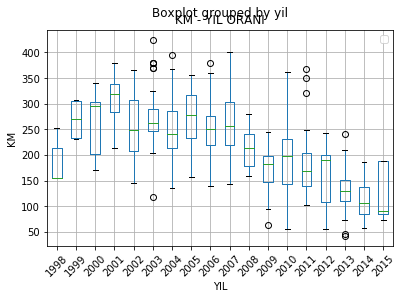

In [13]:
data.boxplot(column="km", by="yil")
plt.legend()
plt.xlabel("YIL")
plt.ylabel("KM")
plt.title("KM - YIL ORANI")
plt.xticks(rotation=45)
plt.show()

Text(0.5,1,'Araçların Yıllara Göre Ortalama Fiyatları')

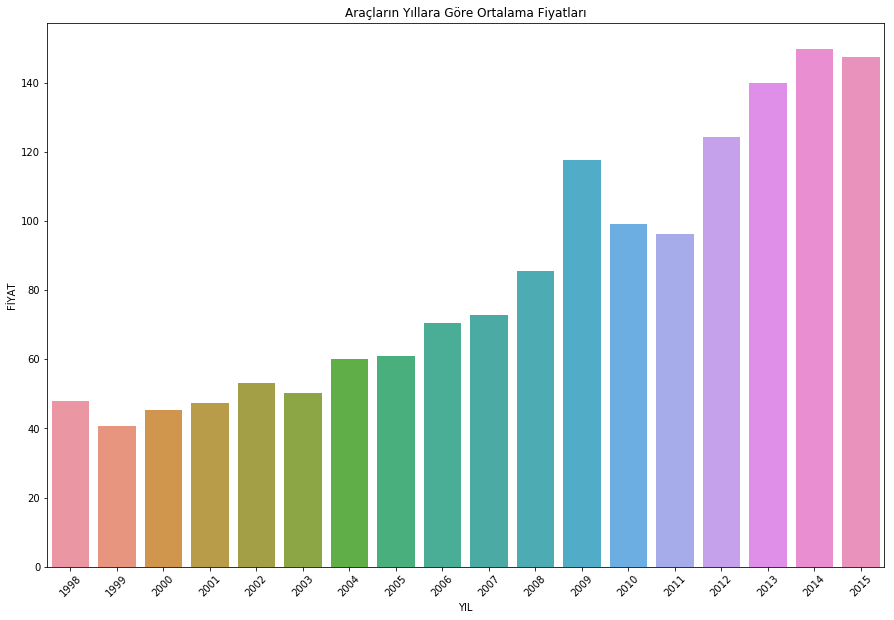

In [14]:
yil_list=list(data['yil'].unique())
fiyat_alan=[]
for i in yil_list:
    t=data[data['yil']==i]
    fiyat_toplam=(sum(t.fiyat)/len(t))
    fiyat_alan.append(fiyat_toplam)
dta=pd.DataFrame({'yil_list':yil_list,'fiyat_alan':fiyat_alan})
new_ind=(dta['fiyat_alan'].sort_values(ascending=True)).index.values
sorted_dta=dta.reindex(new_ind)

plt.figure(figsize=(15,10))
sns.barplot(x=sorted_dta['yil_list'], y=sorted_dta['fiyat_alan'])
plt.xticks(rotation=45)
plt.xlabel('YIL')
plt.ylabel('FİYAT')
plt.title('Araçların Yıllara Göre Ortalama Fiyatları')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15]


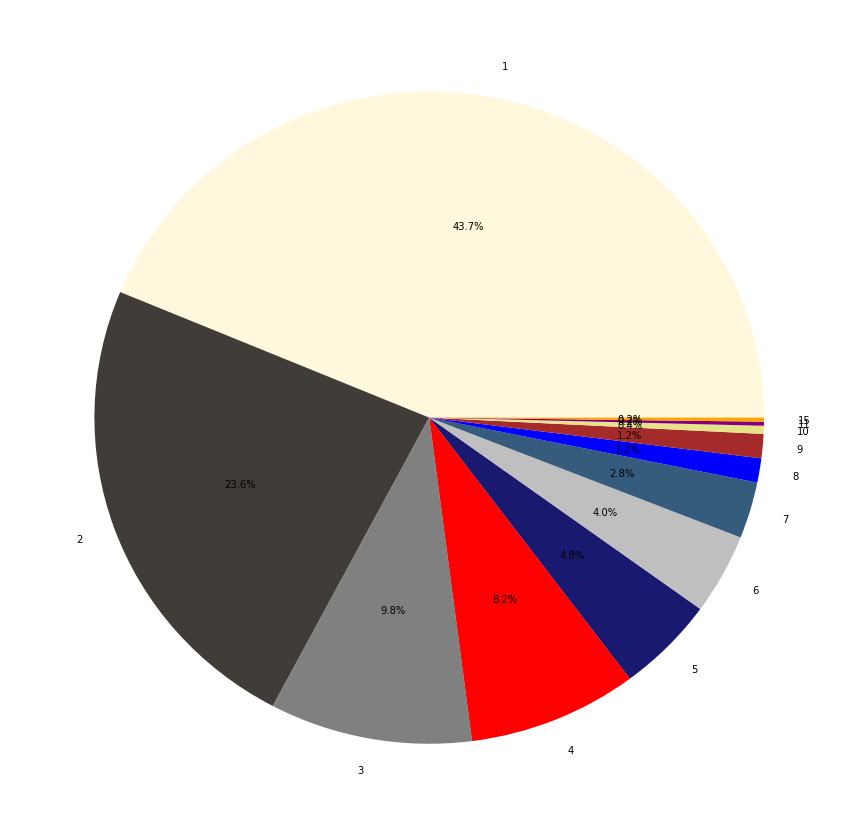

In [15]:
data.renk.head(10)

data.renk.dropna(inplace=True)
#renk alanında boş bırakılan değer varsa onu sil

labels=data.renk.value_counts().index
print(sorted(labels))
sirali=sorted(labels)

colors=['Cornsilk','#403D39','gray','red','MidnightBlue','#BFBFBF','#355C7D','blue','brown','#E8E28B','purple','orange']

explodes=[0,0,0,0,0,0,0,0,0,0,0,0]
sizes=data.renk.value_counts().values

plt.figure(figsize=(15,15))
plt.pie(sizes, explode=explodes, labels=sirali, colors=colors, autopct='%1.1f%%')
plt.show()


#beyaz,siyah,gri,kırmızı,lacivert,gümüş gri,füme,mavi,kahverengi,şampanya,mor,bej,yeşil,turuncu,bordo

In [16]:
from sklearn.model_selection import train_test_split

k=data.iloc[:,5:10].values
#5-10.kolonları alır(yil,yakit,vites,km,renk)
l=data.fiyat.values.reshape(-1,1)
#fiyat kolonunu alır
x,x_test,y,y_test=train_test_split(k,l,test_size=0.2)
rf = RandomForestRegressor(n_estimators = 700)
#(n_estimators) değeri kaç tane ağaç kullanılacağını ifade eder
#(random_state) değeri aynı veriler girildiğinde sonucun kopyalanmasını
#kolaylaştırır(her seferinde sonucun farklı çıkmasını engeller)
rf.fit(x,y.ravel())
#x ve y den aldığı kolonları

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [19]:
yil=input("yıl giriniz \n")
yakit=input("yakıt giriniz \n")
vites=input("vites giriniz \n")
km=input("km giriniz \n")
renk=input("renk giriniz \n")

new_pred = rf.predict(np.array([[int(yil),int(yakit),int(vites),int(km),int(renk)]]))
print("Fiyat değeri : ",new_pred)

print("Training Accuracy = ", rf.score(x, y))
print("Test Accuracy = ", rf.score(x_test, y_test))
#Hata oranı 0.03 tür
#RandomForest doğruluk oranı

yıl giriniz 
2007
yakıt giriniz 
1
vites giriniz 
0
km giriniz 
130
renk giriniz 
2
Fiyat değeri :  [79.23235714]
Training Accuracy =  0.9790066377896542
Test Accuracy =  0.8129765336765817


In [20]:
from sklearn.linear_model import LinearRegression

p=data.iloc[:,5:10].values

r=data.fiyat.values.reshape(-1,1)

x,x_test,y,y_test=train_test_split(p,r,test_size=0.2)

multiple_lineer_regression = LinearRegression()

multiple_lineer_regression.fit(x,y.ravel())

print("b0 (bias değeri) : ", multiple_lineer_regression.intercept_)

print("b1 b2 b3 b4 b5 (eğim değerleri) : ", multiple_lineer_regression.coef_)

yil=input("yıl giriniz \n")
yakit=input("yakıt giriniz \n")
vites=input("vites giriniz \n")
km=input("km giriniz \n")
renk=input("renk giriniz \n")

new_pred = multiple_lineer_regression.predict(np.array([[int(yil),int(yakit),int(vites),int(km),int(renk)]]))

print("Fiyat değeri : ", new_pred)
print("Training Accuracy = ", multiple_lineer_regression.score(x, y))
print("Test Accuracy = ", multiple_lineer_regression.score(x_test, y_test))

b0 (bias değeri) :  -11532.813525155243
b1 b2 b3 b4 b5 (eğim değerleri) :  [ 5.80286994e+00  1.88460358e-14  1.09876344e+00 -1.43265960e-01
  1.56831314e-01]
yıl giriniz 
2007
yakıt giriniz 
1
vites giriniz 
0
km giriniz 
130
renk giriniz 
2
Fiyat değeri :  [95.2355377]
Training Accuracy =  0.7767137945302282
Test Accuracy =  0.7601576991297526
